In [384]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG16,VGG19,ResNet50,ResNet101,ResNet152
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout,UpSampling2D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical 
from keras.datasets import cifar10
from keras.callbacks import LearningRateScheduler

In [385]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std)
x_test = (x_test-mean)/(std)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


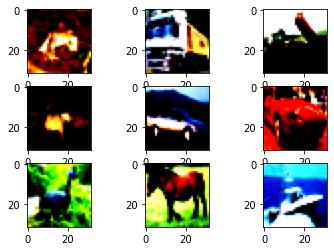

In [386]:
import matplotlib.pyplot as pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [395]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [390]:
train_generator = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=.1) 

In [391]:
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [392]:
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 20:
      lr = 0.0005
    if epoch > 30:
      lr = 0.0002
    return lr

In [393]:
base_model_1 = VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)
base_model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)

In [380]:
batch_size= 256
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [352]:
model_1=Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())
model_1.add(BatchNormalization())
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation=('softmax')))

In [233]:
model_1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model_1.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
scores = model_1.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/50
156/156 [==============================] - 23s 131ms/step - loss: 2.3616 - accuracy: 0.1737 - val_loss: 2.6080 - val_accuracy: 0.1447 - lr: 0.0010
Epoch 2/50
156/156 [==============================] - 20s 129ms/step - loss: 1.9598 - accuracy: 0.2312 - val_loss: 2.6415 - val_accuracy: 0.1107 - lr: 0.0010
Epoch 3/50
156/156 [==============================] - 20s 130ms/step - loss: 1.8481 - accuracy: 0.2507 - val_loss: 2.9012 - val_accuracy: 0.1008 - lr: 0.0010
Epoch 4/50
156/156 [==============================] - 20s 129ms/step - loss: 1.7633 - accuracy: 0.2893 - val_loss: 1.8289 - val_accuracy: 0.2542 - lr: 0.0010
Epoch 5/50
156/156 [==============================] - 20s 130ms/step - loss: 1.7000 - accuracy: 0.3159 - val_loss: 1.6793 - val_accuracy: 0.3164 - lr: 0.0010
Epoch 6/50
156/156 [==============================] - 20s 130ms/step - loss: 1.6520 - accuracy: 0.3370 - val_loss: 5.5891 - val_accuracy: 0.0966 - lr: 0.0010
Epoch 7/50
156/156 [==============================] 

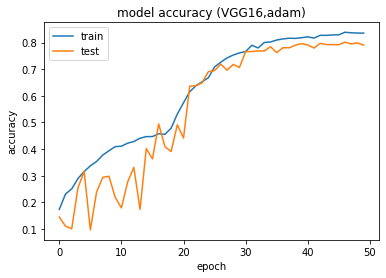

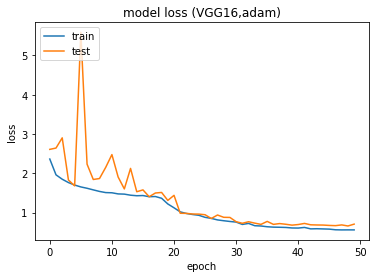

In [234]:
## plot for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy (VGG16,adam)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss (VGG16,adam)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [247]:
model_1=Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())
model_1.add(BatchNormalization())
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.5))
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation=('softmax')))

In [248]:
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model_1.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
scores = model_1.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/50
156/156 [==============================] - 22s 131ms/step - loss: 2.7418 - accuracy: 0.1355 - val_loss: 2.7547 - val_accuracy: 0.1100 - lr: 0.0010
Epoch 2/50
156/156 [==============================] - 20s 128ms/step - loss: 2.1071 - accuracy: 0.2590 - val_loss: 1.6190 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 3/50
156/156 [==============================] - 20s 128ms/step - loss: 1.7222 - accuracy: 0.3743 - val_loss: 1.7462 - val_accuracy: 0.3480 - lr: 0.0010
Epoch 4/50
156/156 [==============================] - 20s 130ms/step - loss: 1.4937 - accuracy: 0.4587 - val_loss: 1.5567 - val_accuracy: 0.4323 - lr: 0.0010
Epoch 5/50
156/156 [==============================] - 20s 129ms/step - loss: 1.3205 - accuracy: 0.5307 - val_loss: 1.2905 - val_accuracy: 0.5380 - lr: 0.0010
Epoch 6/50
156/156 [==============================] - 20s 130ms/step - loss: 1.2015 - accuracy: 0.5841 - val_loss: 1.1642 - val_accuracy: 0.5883 - lr: 0.0010
Epoch 7/50
156/156 [==============================] 

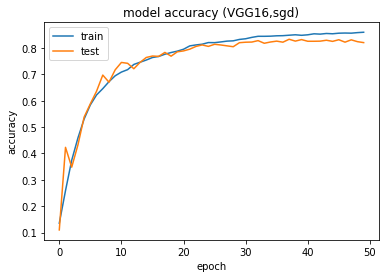

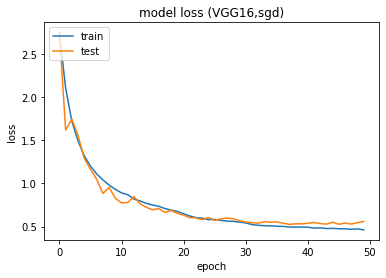

In [249]:
## plot for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy (VGG16,sgd)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (VGG16,sgd)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(BatchNormalization())
model_2.add(Dense(1024,activation=('relu'),input_dim=512))
model_2.add(Dropout(.5))
model_2.add(BatchNormalization())
model_2.add(Dense(512,activation=('relu'))) 
model_2.add(Dropout(.5))
model_2.add(BatchNormalization())
model_2.add(Dense(256,activation=('relu'))) 
model_2.add(Dropout(.5))
model_2.add(BatchNormalization())
model_2.add(Dense(128,activation=('relu')))
model_2.add(Dropout(.5))
model_2.add(BatchNormalization())
model_2.add(Dense(10,activation=('softmax')))

In [382]:
model_2.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model_2.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                     epochs=epochs,steps_per_epoch=x_train.shape[0]//batch_size,
                     validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
scores = model_2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/50
156/156 [==============================] - 29s 144ms/step - loss: 2.3872 - accuracy: 0.1747 - val_loss: 4.7701 - val_accuracy: 0.1033 - lr: 0.0010
Epoch 2/50
156/156 [==============================] - 21s 133ms/step - loss: 1.6247 - accuracy: 0.4001 - val_loss: 2.8092 - val_accuracy: 0.1244 - lr: 0.0010
Epoch 3/50
156/156 [==============================] - 21s 133ms/step - loss: 1.2762 - accuracy: 0.5590 - val_loss: 2.9805 - val_accuracy: 0.1561 - lr: 0.0010
Epoch 4/50
156/156 [==============================] - 21s 132ms/step - loss: 1.1151 - accuracy: 0.6372 - val_loss: 2.3044 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/50
156/156 [==============================] - 21s 133ms/step - loss: 1.0013 - accuracy: 0.6770 - val_loss: 1.2705 - val_accuracy: 0.5927 - lr: 0.0010
Epoch 6/50
156/156 [==============================] - 21s 135ms/step - loss: 0.9338 - accuracy: 0.6990 - val_loss: 1.0677 - val_accuracy: 0.6648 - lr: 0.0010
Epoch 7/50
156/156 [==============================] 

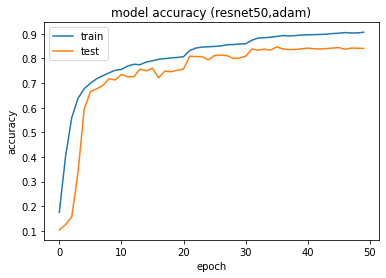

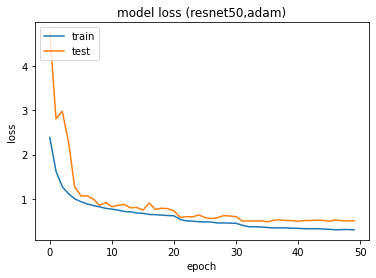

In [383]:
## plot for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy (resnet50,adam)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss (resnet50,adam)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [353]:
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(BatchNormalization())
model_2.add(Dense(10,activation=('softmax')))

In [354]:
model_2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
history4 = model_2.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                     epochs=epochs,steps_per_epoch=x_train.shape[0]//batch_size,
                     validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                      callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
scores = model_2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/50
156/156 [==============================] - 27s 140ms/step - loss: 1.9160 - accuracy: 0.3646 - val_loss: 6.5476 - val_accuracy: 0.1035 - lr: 0.0010
Epoch 2/50
156/156 [==============================] - 21s 134ms/step - loss: 1.2485 - accuracy: 0.5704 - val_loss: 8.2430 - val_accuracy: 0.1143 - lr: 0.0010
Epoch 3/50
156/156 [==============================] - 21s 131ms/step - loss: 1.0669 - accuracy: 0.6300 - val_loss: 2.8687 - val_accuracy: 0.2195 - lr: 0.0010
Epoch 4/50
156/156 [==============================] - 21s 132ms/step - loss: 0.9569 - accuracy: 0.6670 - val_loss: 1.9267 - val_accuracy: 0.3722 - lr: 0.0010
Epoch 5/50
156/156 [==============================] - 21s 132ms/step - loss: 0.8881 - accuracy: 0.6907 - val_loss: 1.0744 - val_accuracy: 0.6154 - lr: 0.0010
Epoch 6/50
156/156 [==============================] - 21s 132ms/step - loss: 0.8302 - accuracy: 0.7104 - val_loss: 0.8738 - val_accuracy: 0.6954 - lr: 0.0010
Epoch 7/50
156/156 [==============================] 

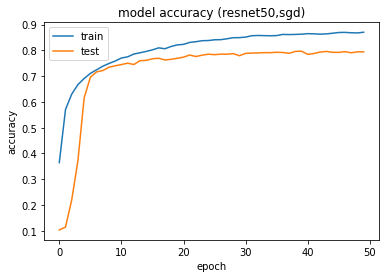

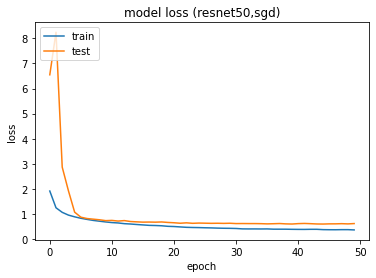

In [355]:
## plot for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy (resnet50,sgd)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss (resnet50,sgd)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()